In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the dataset
df = pd.read_csv('/content/drive/MyDrive/notebooks /Obesity Classification.csv')

In [ ]:
#checking for rows and columns
df.shape

(108, 7)

In [ ]:
#top 5 rows
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [ ]:
#checking for datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [ ]:
#check for missing data
df.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

In [ ]:
#checking for null
df.isnull().values.any()

False

In [ ]:
#basic statistical description about our dataset.
df.describe()

,ID,Age,Height,Weight,BMI
count,108.000000,108.000000,108.000000,108.000000,108.000000
mean,56.046296,46.555556,166.574074,59.490741,20.549074
std,31.917939,24.720620,27.873615,28.856233,7.583818
min,1.000000,11.000000,120.000000,10.000000,3.900000
25%,28.750000,27.000000,140.000000,35.000000,16.700000
50%,56.500000,42.500000,175.000000,55.000000,21.200000
75%,83.250000,59.250000,190.000000,85.000000,26.100000
max,110.000000,112.000000,210.000000,120.000000,37.200000


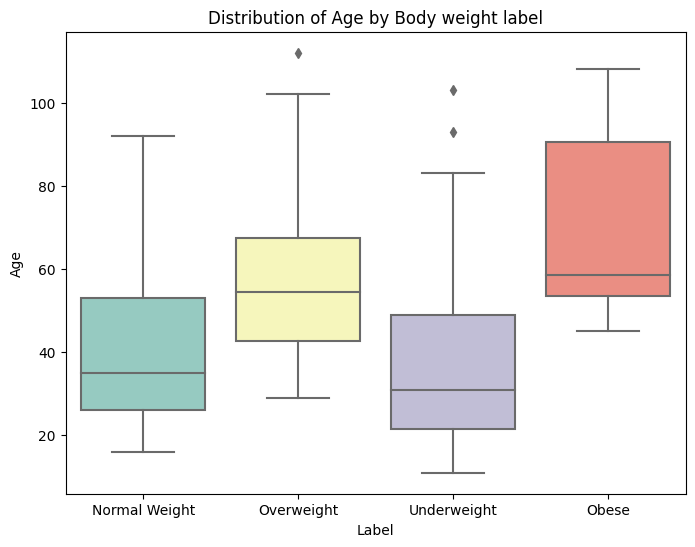

In [ ]:
# Create a box plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.boxplot(x="Label", y="Age", data=df, palette="Set3")

# Set labels and title

plt.ylabel("Age")
plt.title("Distribution of Age by Body weight label")

# Show the plot
plt.show()
#credit- chatgpt

In [ ]:
#checking the diagnosis for each category
df['Label'].value_counts()

Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: Label, dtype: int64

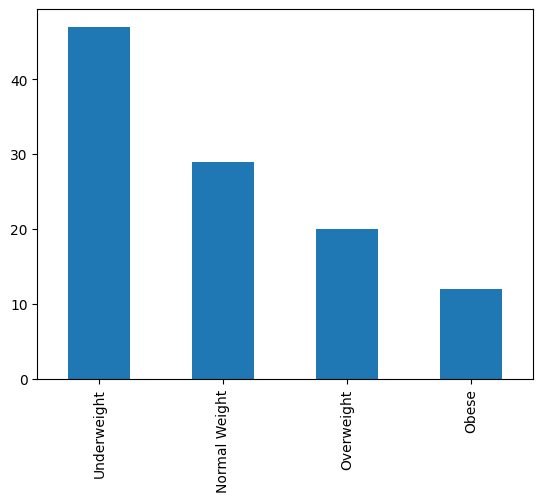

In [ ]:
#created a bar graph to visualize the "Labels"
df['Label'].value_counts().plot(kind='bar');

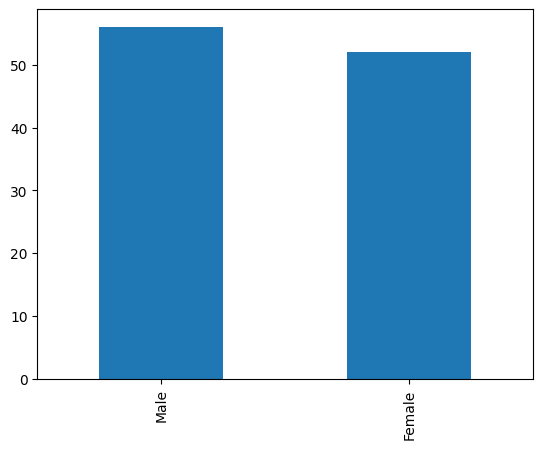

In [ ]:
#created a bar graph to visualize Gender
df['Gender'].value_counts().plot(kind='bar');

<ipython-input-195-f7d4e4383a66>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt ='.0%')


<Axes: >

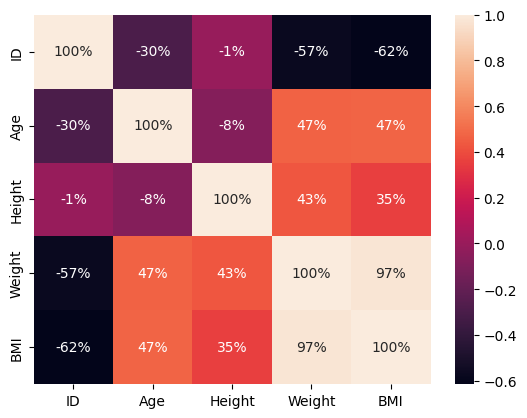

In [ ]:
#created a correlation plot.
sns.heatmap(df.corr(), annot=True, fmt ='.0%')

In [ ]:
#encoded the Gender column because it was a string.
sex =  pd.get_dummies(df['Gender'], drop_first=True)
sex

,Male
0,1
1,0
2,1
3,0
4,1
...,...
103,1
104,0
105,1
106,0


In [ ]:
#dropped the Gender column
df = df.drop(['Gender'], axis = 1)

In [ ]:
#merged the sex dataset back to df
df = pd.concat([df, sex], axis=1)

In [ ]:
#now the dataset is shown as male=1 and female= 0
df

,ID,Age,Height,Weight,BMI,Label,Male
0,1,25,175,80,25.3,Normal Weight,1
1,2,30,160,60,22.5,Normal Weight,0
2,3,35,180,90,27.3,Overweight,1
3,4,40,150,50,20.0,Underweight,0
4,5,45,190,100,31.2,Obese,1
...,...,...,...,...,...,...,...
103,106,11,175,10,3.9,Underweight,1
104,107,16,160,10,3.9,Underweight,0
105,108,21,180,15,5.6,Underweight,1
106,109,26,150,15,5.6,Underweight,0


In [ ]:
#Id isnt necessary here, therefore, it gets dropped.
df.drop("ID", axis=1)

,Age,Height,Weight,BMI,Label,Male
0,25,175,80,25.3,Normal Weight,1
1,30,160,60,22.5,Normal Weight,0
2,35,180,90,27.3,Overweight,1
3,40,150,50,20.0,Underweight,0
4,45,190,100,31.2,Obese,1
...,...,...,...,...,...,...
103,11,175,10,3.9,Underweight,1
104,16,160,10,3.9,Underweight,0
105,21,180,15,5.6,Underweight,1
106,26,150,15,5.6,Underweight,0


separating features and labels

```

```



In [ ]:
X = df[['Age',	'Height',	'Weight',	'BMI', "Male"]]#.values

In [ ]:
y = df[['Label']]#.values

Splitting the dataset into training and tests sets

In [ ]:
## Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 20)

feature scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Training a decision tree classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

Taking a look at the different parameters of the mode

In [ ]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Decision Tree - Generating Classification Report

In [ ]:
print(classification_report(y_test, y_pred_dt, target_names = ['NW', 'O', "OW", "UW"]))

              precision    recall  f1-score   support

          NW       1.00      1.00      1.00         7
           O       0.75      1.00      0.86         3
          OW       1.00      0.89      0.94         9
          UW       1.00      1.00      1.00        14

    accuracy                           0.97        33
   macro avg       0.94      0.97      0.95        33
weighted avg       0.98      0.97      0.97        33



Getting the coefficients of the different features

In [ ]:
dt.feature_importances_

array([0.        , 0.03116883, 0.50454545, 0.46428571, 0.        ])

Storing the column names in a variable. We are building a dataframe with the features and their corresponding rank

In [ ]:
feature_names = X.columns

In [ ]:
feature_importance = pd.DataFrame(dt.feature_importances_, index = feature_names).sort_values(0,ascending=False)

We can see that the 'BMI' feature was considered the most important

In [ ]:
feature_importance

,0
Weight,0.504545
BMI,0.464286
Height,0.031169
Age,0.000000
Male,0.000000


Feature Importance via a Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=10, random_state=1)

generating rf classification report.

In [ ]:
y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         7
        Obese       1.00      1.00      1.00         3
   Overweight       1.00      1.00      1.00         9
  Underweight       1.00      1.00      1.00        14

     accuracy                           1.00        33
    macro avg       1.00      1.00      1.00        33
 weighted avg       1.00      1.00      1.00        33



In [ ]:
## Train the RandomForest model using the training data
rf.fit(X_train, y_train)

<ipython-input-214-168a6fc83696>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10, random_state=1)

In [ ]:
## Calculate feature importances using the trained RandomForest model

feature_importance = pd.DataFrame(rf.feature_importances_, index = feature_names).sort_values(0,ascending=False)

Generating feature importance for RF

In [ ]:
## Calculate feature importances using the trained RandomForest model
feature_importance

,0
Weight,0.502146
BMI,0.358272
Age,0.082648
Height,0.047486
Male,0.009448


We can see that Weight is ranked the highest.

CREDIT: Chatgpt- helped me fix errors in this lab.